### 单变量房价预测

In [1]:
# 用白色的作背景、线是使用黑色的线
import pandas as pd
import seaborn as sns
sns.set(context = 'notebook', style = 'whitegrid', palette = 'dark')

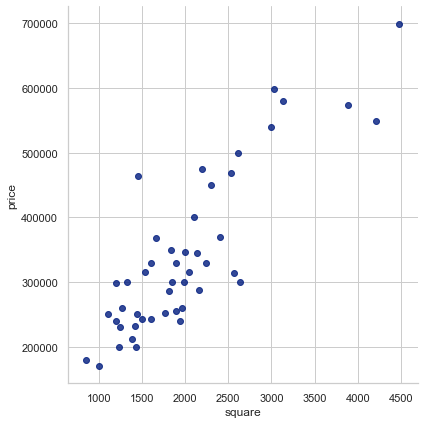

In [2]:
df0 = pd.read_csv('data0.csv', names = ['square', 'price'])
sns.lmplot('square', 'price', df0, height = 6, fit_reg = False)

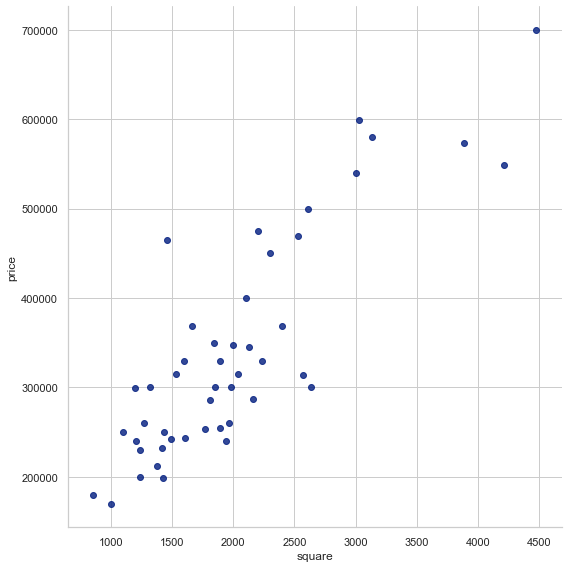

In [3]:
df0 = pd.read_csv('data0.csv', names = ['square', 'price'])
sns.lmplot('square', 'price', df0, height = 8, fit_reg = False)

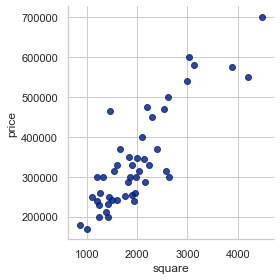

In [4]:
df0 = pd.read_csv('data0.csv', names = ['square', 'price'])
sns.lmplot('square', 'price', df0, height = 4, fit_reg = False)

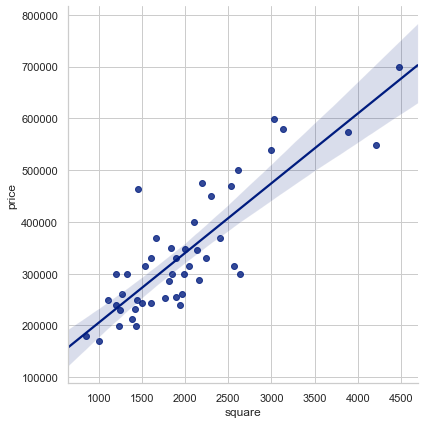

In [5]:
df0 = pd.read_csv('data0.csv', names = ['square', 'price'])
sns.lmplot('square', 'price', df0, height = 6, fit_reg = True)

In [6]:
# 读取数据框的前 5 项
df0.head()

,square,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [7]:
# 读取所有的数据
df0

,square,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900
5,1985,299900
6,1534,314900
7,1427,198999
8,1380,212000
9,1494,242500


In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
square    47 non-null int64
price     47 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


### 多变量房价预测

In [9]:
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d 

df1 = pd.read_csv('data1.csv', names = ['square', 'bedrooms', 'price'])
df1.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


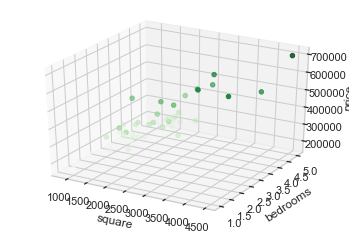

In [10]:
fig = plt.figure()
# 创建一个 Axes3D object
ax = plt.axes(projection = '3d')
# 设置 3 个坐标轴的名称
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price') 
# 绘制 3D 散点图
ax.scatter3D(df1['square'], df1['bedrooms'], df1['price'], c = df1['price'], cmap = 'Greens')

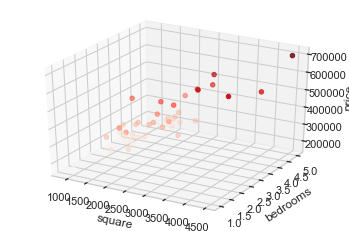

In [11]:
fig = plt.figure()
# 创建一个 Axes3D object
ax = plt.axes(projection = '3d')
# 设置 3 个坐标轴的名称
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
# 绘制 3D 散点图
ax.scatter3D(df1['square'], df1['bedrooms'], df1['price'], c = df1['price'], cmap = 'Reds')

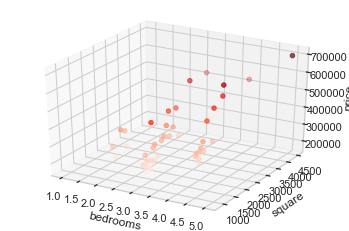

In [12]:
fig = plt.figure()
# 创建一个 Axes3D object
ax = plt.axes(projection = '3d')
# 设置 3 个坐标轴的名称
ax.set_xlabel('bedrooms')
ax.set_ylabel('square')
ax.set_zlabel('price')
# 绘制 3D 散点图
ax.scatter3D(df1['bedrooms'], df1['square'], df1['price'], c = df1['price'], cmap = 'Reds')

### 数据规范化

In [13]:
def normalize_feature(df):
    return df.apply(lambda column:(column - column.mean()) / column.std())

df = normalize_feature(df1)
df.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


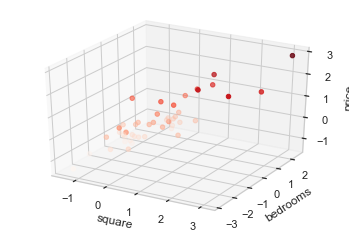

In [14]:
ax = plt.axes(projection = '3d')
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.scatter3D(df['square'], df['bedrooms'], df['price'], c = df['price'], cmap = 'Reds')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
square      47 non-null float64
bedrooms    47 non-null float64
price       47 non-null float64
dtypes: float64(3)
memory usage: 1.2 KB


### 数据处理：添加 ones 列（x0）

In [16]:
import numpy as np
ones = pd.DataFrame({'ones': np.ones(len(df))}) # ones是 n行 1列的数据框，表示 x0 恒为 1

In [17]:
ones.head()

,ones
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [18]:
ones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 1 columns):
ones    47 non-null float64
dtypes: float64(1)
memory usage: 504.0 bytes


In [19]:
df = pd.concat([ones, df], axis = 1) # 根据列合并数据
df.head()

,ones,square,bedrooms,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
ones        47 non-null float64
square      47 non-null float64
bedrooms    47 non-null float64
price       47 non-null float64
dtypes: float64(4)
memory usage: 1.6 KB
